In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv('Tesla_sales.csv', index_col ='Date',parse_dates =True)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
df.shape
df.head()

,Volume
Date,
2017-01-03,5923300
2017-02-10,3619700
2017-02-28,6078100
2017-11-22,4917600
2017-12-28,4316300


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52 entries, 2017-01-03 to 2020-02-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Volume  52 non-null     int64
dtypes: int64(1)
memory usage: 832.0 bytes


In [5]:
train=df[0:-12] 
test=df[-12:]

In [6]:
print(train.shape)
print(test.shape)

(40, 1)
(12, 1)


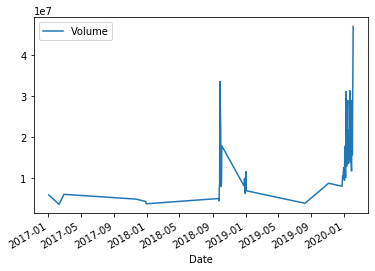

In [7]:
df.plot()
plt.show()

#### ARIMA Model

<Figure size 432x288 with 0 Axes>

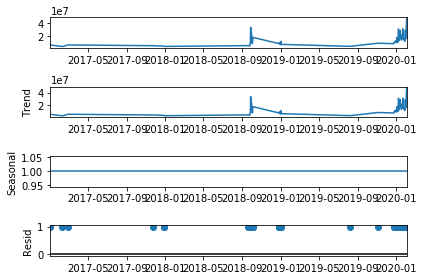

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
result = seasonal_decompose(df, model ='multiplicative', extrapolate_trend='freq', period=1) # use multiplicative model for seasonal decomposition
plt.tight_layout() 
result.plot()
plt.show()

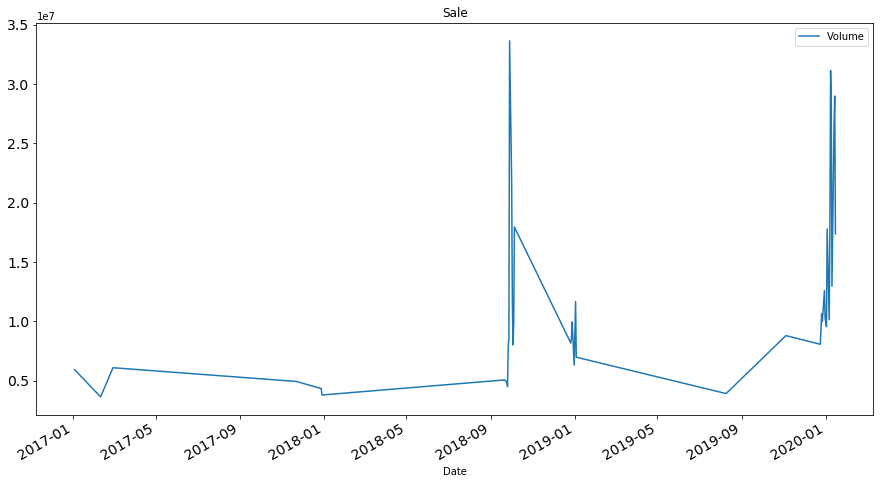

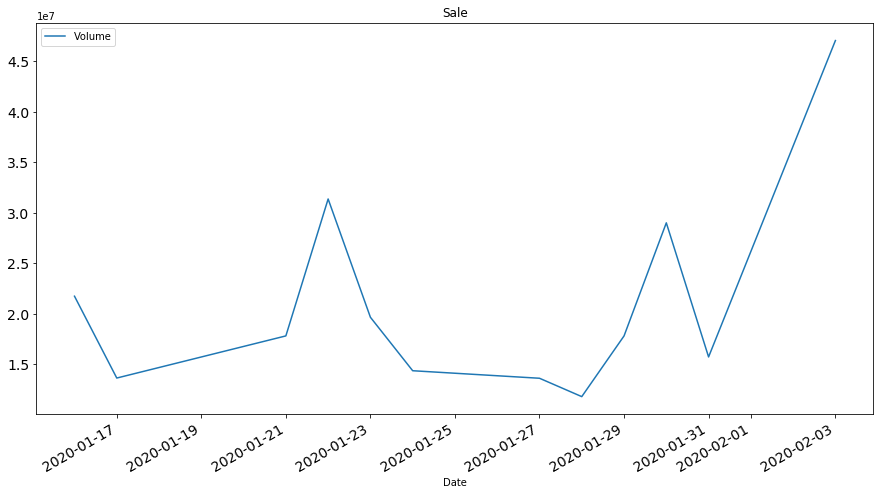

In [9]:
#Plotting train and test data
train.plot(figsize=(15,8), title= 'Sale', fontsize=14)
test.plot(figsize=(15,8), title= 'Sale', fontsize=14)
plt.show()

In [10]:
from statsmodels.tsa.stattools import adfuller
# Run Dicky-Fuller test
result = adfuller(df['Volume'])
# Print test statistic
print(result)

(-2.9890617405203055, 0.035928599672530155, 0, 51, {'1%': -3.5656240522121956, '5%': -2.920142229157715, '10%': -2.598014675124952}, 1389.077801419228)


In [11]:
# Import the SARIMAX model

from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(df, order=(2,1,2))


D:\Software\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Software\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [12]:
results = model.fit()

# Print fit summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                 Volume   No. Observations:                   52
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -881.939
Date:                Sun, 28 Feb 2021   AIC                           1773.878
Time:                        21:46:40   BIC                           1783.537
Sample:                             0   HQIC                          1777.569
                                 - 52                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6794      0.905     -0.751      0.453      -2.453       1.094
ar.L2         -0.0542      0.394     -0.138      0.891      -0.826       0.718
ma.L1          0.1530      0.834      0.183      0.8

In [13]:
#Create empty list to store search results
order_aic_bic=[]
# Loop over p values from 0-2
for p in range(3):
# Loop over q values from 0-2
    for q in range(3):
        try:
            # Create and fit ARIMA(p,d,q) model
            model = SARIMAX(df, order=(p,0,q), trend='c')
            results = model.fit()
            # Append order and results tuple
            order_aic_bic.append((p,q,results.aic, results.bic))
        except:
            print(p, q, None, None)

D:\Software\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Software\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Software\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Software\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored whe

In [14]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

   p  q      AIC      BIC
3  1  0 1,807.15 1,813.01
6  2  0 1,807.32 1,815.12
4  1  1 1,807.33 1,815.13
7  2  1 1,808.78 1,818.54
5  1  2 1,809.65 1,819.40
8  2  2 1,809.75 1,821.46
1  0  1 1,812.61 1,818.46
2  0  2 1,813.06 1,820.86
0  0  0 1,820.01 1,823.91
   p  q      AIC      BIC
3  1  0 1,807.15 1,813.01
6  2  0 1,807.32 1,815.12
4  1  1 1,807.33 1,815.13
1  0  1 1,812.61 1,818.46
7  2  1 1,808.78 1,818.54
5  1  2 1,809.65 1,819.40
2  0  2 1,813.06 1,820.86
8  2  2 1,809.75 1,821.46
0  0  0 1,820.01 1,823.91


In [15]:
# Instantiate the model
arma = SARIMAX(df, order=(1,1,2))
results = arma.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                 Volume   No. Observations:                   52
Model:               SARIMAX(1, 1, 2)   Log Likelihood                -881.969
Date:                Sun, 28 Feb 2021   AIC                           1771.938
Time:                        21:46:41   BIC                           1779.665
Sample:                             0   HQIC                          1774.890
                                 - 52                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6544      0.949     -0.690      0.490      -2.513       1.205
ma.L1          0.1306      0.843      0.155      0.877      -1.522       1.783
ma.L2         -0.5418      0.567     -0.956      0.3

D:\Software\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Software\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


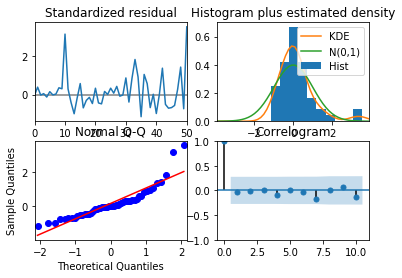

In [16]:
# Create the 4 diagostics plots
results.plot_diagnostics()
plt.show()

In [17]:
 #Generate predictions
one_step_forecast = results.get_prediction(start=-20, dynamic = True)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Volume']
upper_limits = confidence_intervals.loc[:,'upper Volume']

# Print best estimate predictions
print(mean_forecast)

Date
2020-01-06   13,450,882.76
2020-01-07   12,272,491.57
2020-01-08   13,043,633.17
2020-01-09   12,538,996.53
2020-01-10   12,869,231.78
2020-01-13   12,653,125.16
2020-01-14   12,794,545.77
2020-01-15   12,701,999.83
2020-01-16   12,762,562.09
2020-01-17   12,722,930.02
2020-01-21   12,748,865.33
2020-01-22   12,731,893.21
2020-01-23   12,742,999.80
2020-01-24   12,735,731.63
2020-01-27   12,740,487.93
2020-01-28   12,737,375.40
2020-01-29   12,739,412.25
2020-01-30   12,738,079.33
2020-01-31   12,738,951.59
2020-02-03   12,738,380.78
dtype: float64


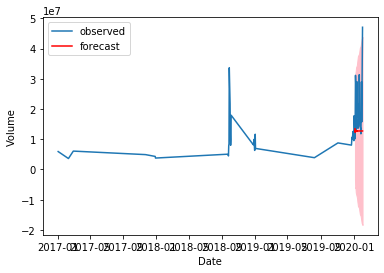

In [18]:
# plot the  data
plt.plot(df.index, df, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

#### Simple Exponential Smoothing

MAE 7,650,438.00
MSE 95,335,948,112,287.98
RMSE 9,764,012.91


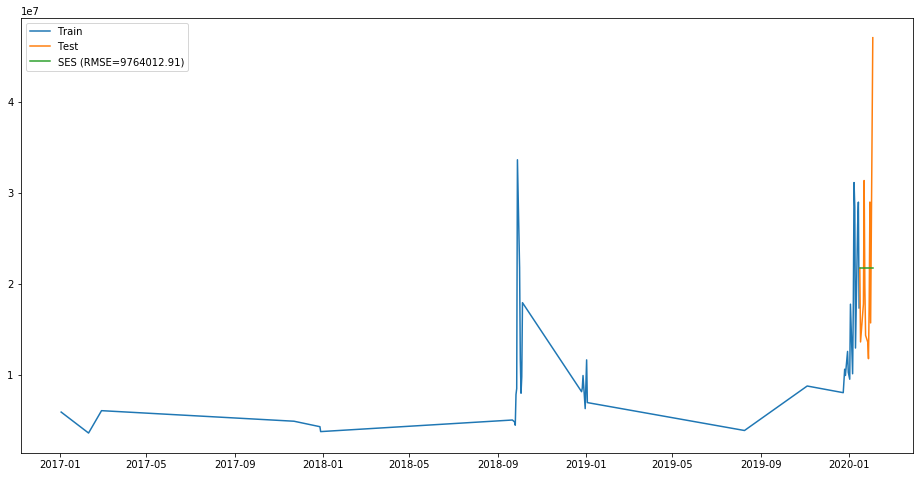

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
# Fit the model
pred = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Volume'])).fit(smoothing_level=0.3,optimized=False)
pred['SES'] = fit2.forecast(len(test))
# Calculate KPI's
mae_SES = mean_absolute_error(test.Volume, pred.SES)
mse_SES=mean_squared_error(test.Volume, pred.SES)
rmse_SES = sqrt(mean_squared_error(test.Volume, pred.SES))
print("MAE {:,.2f}".format(mae_SES))
print("MSE {:,.2f}".format(mse_SES))
print("RMSE {:,.2f}".format(rmse_SES))
# Plot
plt.figure(figsize=(16,8))
plt.plot(train['Volume'], label='Train')
plt.plot(test['Volume'], label='Test')
plt.plot(pred['SES'], label='SES (RMSE={:.2f})'.format(rmse_SES)) 
plt.legend()
plt.show()

In [20]:
pred

,Volume,SES
Date,,
2020-01-16,21736700,"21,742,809.34"
2020-01-17,13629100,"21,742,809.34"
2020-01-21,17803500,"21,742,809.34"
2020-01-22,31369000,"21,742,809.34"
2020-01-23,19651000,"21,742,809.34"
2020-01-24,14353600,"21,742,809.34"
2020-01-27,13608100,"21,742,809.34"
2020-01-28,11788500,"21,742,809.34"
2020-01-29,17801500,"21,742,809.34"


#### Double Exponential Smoothing (Holt)

MAE 10,712,781.70
MSE 141,251,527,392,714.16
RMSE 11,884,928.58


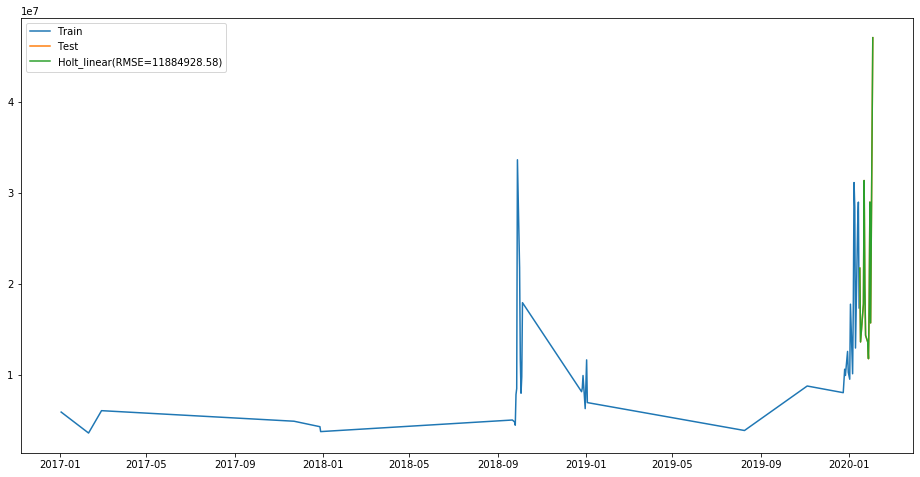

In [21]:
# Fit the model
pred = test.copy()
fit1 = Holt(np.asarray(train['Volume'])).fit(smoothing_level = 0.3,smoothing_slope = 0.4)
pred['Holt_linear'] = fit1.forecast(len(test))
# Calculate KPI
mae_DES = mean_absolute_error(test.Volume, pred.Holt_linear)
mse_DES=mean_squared_error(test.Volume, pred.Holt_linear)
rmse_DES = sqrt(mean_squared_error(test.Volume, pred.Holt_linear))
print("MAE {:,.2f}".format(mae_DES))
print("MSE {:,.2f}".format(mse_DES))
print("RMSE {:,.2f}".format(rmse_DES))
# Plot
plt.figure(figsize=(16,8))
plt.plot(train['Volume'], label='Train')
plt.plot(test['Volume'], label='Test')
plt.plot(pred['Volume'], label='Holt_linear(RMSE={:.2f})'.format(rmse_DES))
plt.legend()
plt.show()

In [22]:
pred

,Volume,Holt_linear
Date,,
2020-01-16,21736700,"26,498,304.56"
2020-01-17,13629100,"26,846,460.98"
2020-01-21,17803500,"27,194,617.40"
2020-01-22,31369000,"27,542,773.82"
2020-01-23,19651000,"27,890,930.24"
2020-01-24,14353600,"28,239,086.66"
2020-01-27,13608100,"28,587,243.08"
2020-01-28,11788500,"28,935,399.50"
2020-01-29,17801500,"29,283,555.92"


#### Triple Exponential Smoothing (Holt Winters)

MAE 8,862,299.73
MSE 138,790,034,819,627.36
RMSE 11,780,918.25


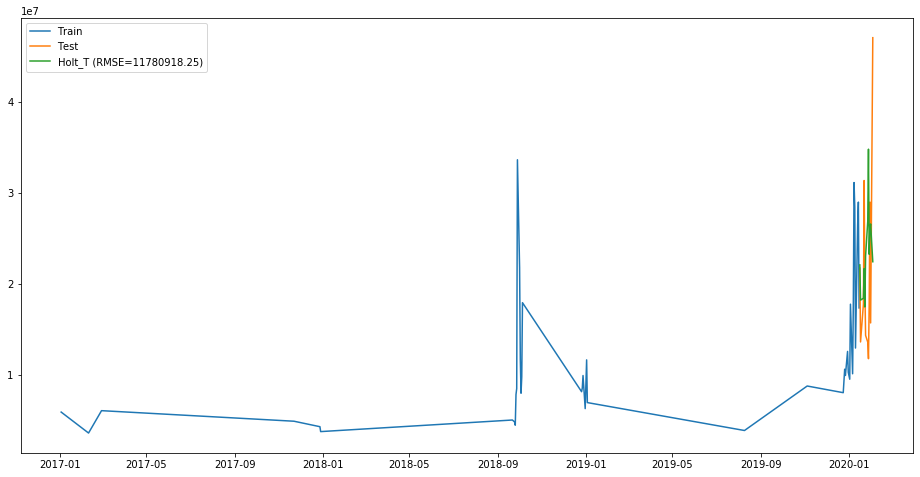

In [23]:
# Fit the model
pred = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Volume']) ,seasonal_periods=12 ,trend='add', seasonal='add').fit()

pred['Holt_T'] = fit1.forecast(len(test))
# Calculate KPI's
mae_TES = mean_absolute_error(test.Volume, pred.Holt_T)
mse_TES=mean_squared_error(test.Volume, pred.Holt_T)
rmse_TES = sqrt(mean_squared_error(test.Volume, pred.Holt_T))
print("MAE {:,.2f}".format(mae_TES))
print("MSE {:,.2f}".format(mse_TES))
print("RMSE {:,.2f}".format(rmse_TES))
# Plot
plt.figure(figsize=(16,8))
plt.plot( train['Volume'], label='Train')
plt.plot(test['Volume'], label='Test')
plt.plot(pred['Holt_T'], label='Holt_T (RMSE={:.2f})'.format(rmse_TES))

plt.legend()
plt.show()

In [24]:
pred

,Volume,Holt_T
Date,,
2020-01-16,21736700,"22,095,432.00"
2020-01-17,13629100,"18,227,026.54"
2020-01-21,17803500,"18,432,843.07"
2020-01-22,31369000,"21,689,289.61"
2020-01-23,19651000,"17,469,487.85"
2020-01-24,14353600,"23,082,468.94"
2020-01-27,13608100,"26,882,650.29"
2020-01-28,11788500,"34,811,505.79"
2020-01-29,17801500,"23,265,716.98"


### MA Model

In [25]:
df['SMA_12'] = df.Volume.rolling(12, min_periods=1).mean()
df.head()

,Volume,SMA_12
Date,,
2017-01-03,5923300,"5,923,300.00"
2017-02-10,3619700,"4,771,500.00"
2017-02-28,6078100,"5,207,033.33"
2017-11-22,4917600,"5,134,675.00"
2017-12-28,4316300,"4,971,000.00"


In [26]:
df['Error_12']=df['Volume']-df['SMA_12']
df.head()

,Volume,SMA_12,Error_12
Date,,,
2017-01-03,5923300,"5,923,300.00",0.00
2017-02-10,3619700,"4,771,500.00","-1,151,800.00"
2017-02-28,6078100,"5,207,033.33","871,066.67"
2017-11-22,4917600,"5,134,675.00","-217,075.00"
2017-12-28,4316300,"4,971,000.00","-654,700.00"


Text(0, 0.5, 'Demand')

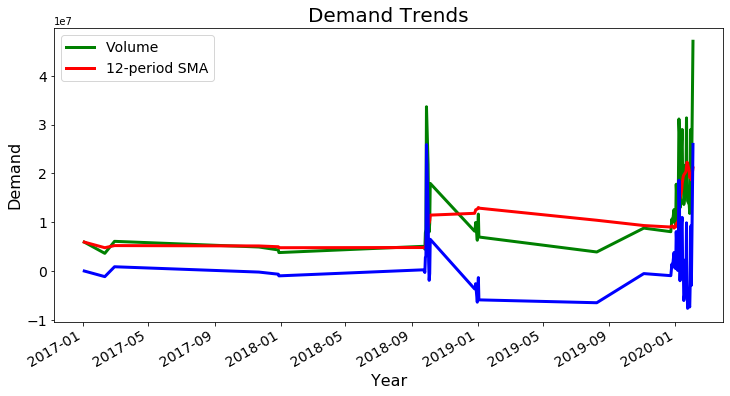

In [27]:
# colors for the line plot
colors = ['green', 'red', 'blue', 'yellow']


# line plot for demand
df.plot(color=colors, linewidth=3, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Volume', '12-period SMA'], fontsize=14)

# title and labels
plt.title('Demand Trends', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Demand', fontsize=16)

In [28]:
# For KPI Calculation
mae_MA = df["Error_12"].abs().mean()  
print("MAE:",round(mae_MA,2)) 
rmse_MA = np.sqrt((df["Error_12"]**2).mean())
print("RMSE:",round(rmse_MA,2))
mse_MA = (df["Error_12"]**2).mean()
print("MSE:",round(mse_MA,2))

MAE: 4931460.13
RMSE: 7648706.31
MSE: 58502708229607.28


#### Linear Regression

In [29]:
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df1 =  pd.read_csv('Tesla_sales.csv')
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Date']=df1['Date'].map(dt.datetime.toordinal)
y = np.asarray(df1['Volume'])
X = df1[['Date']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.7,random_state=42)

model = LinearRegression() #create linear regression object
model.fit(X_train, y_train) #train model on train data
model.score(X_train, y_train) #check score
print ("Coefficient: \n", model.coef_)
print ("Intercept: \n", model.intercept_) 
coefs = zip(model.coef_, X.columns)
model.__dict__

Coefficient: 
 [24980.74034969]
Intercept: 
 -18400343958.688175


{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'n_features_in_': 1,
 'coef_': array([24980.74034969]),
 '_residues': 1239672456125540.5,
 'rank_': 1,
 'singular_': array([1139.43916029]),
 'intercept_': -18400343958.688175}